# CRISP-DM Methodology: Data Understanding (Exploratory Data Analysis)
This notebook is part of the **Data Understanding** stage of the CRISP-DM methodology.

### Business Understanding:
The goal of this project is to analyze and extract patterns, trends, and insights from the data to solve specific business problems. Before performing EDA, the data collected from sources (e.g., web scraping) is prepared for exploration.

### Exploratory Data Analysis (EDA):
In this notebook, we perform **Exploratory Data Analysis** to:
- Understand the structure and content of the data.
- Identify patterns, trends, and correlations.
- Check for missing values, outliers, and inconsistencies.
- Visualize distributions and relationships between variables.

Each section in this notebook is explained step-by-step for clarity.


### `Import Necessary Libraries`
#### numpy: For numerical operations and array manipulation  
#### pandas: For data manipulation and analysis  
#### matplotlib: For creating static visualizations  
#### seaborn: For statistical plots and visualizations  
#### plotly: For interactive charts and graphs  
#### wordcloud: For generating word clouds from text data

In [1]:
!pip install numpy pandas matplotlib seaborn plotly wordcloud

### Install or upgrade the nbformat library
#### nbformat is a package used to handle Jupyter Notebook (.ipynb) file formats.
#### The '--upgrade' flag ensures the latest version is installed.

In [2]:
!pip install --upgrade nbformat

In [3]:
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### `Load the Dataset into Pandas DataFrame`

In [17]:
df = pd.read_csv('preprocessed_data.csv')
dff = df.copy()

<center> <h2> Understanding the LeetCode Dataset </h2> </center>

- `Overview`

    - The dataset I scraped from the LeetCode website provides information about various programming problems available on the platform. Each row in the dataset corresponds to a specific problem and includes details such as problem ID, premium status, title, problem description, topic tags, difficulty level, similar questions, acceptance rate, and more.

- `Key Columns`

    1. **id**: A unique identifier for each problem.
    2. **page_number**: The specific page on the website where the LeetCode problem appears.
    3. **is_premium**: Indicates whether the problem is available to premium LeetCode users.
    4. **title**: The title of the problem.
    5. **problem_description**: A detailed description of the problem.
    6. **topic_tags**: Tags representing the topics associated with the problem.
    7. **difficulty**: The difficulty level of the problem (Easy, Medium, Hard).
    8. **similar_questions**: List of similar questions to the current problem.
    9. **no_similar_questions**: The number of similar questions.
    10. **acceptance**: Acceptance rate for the problem.
    11. **accepted**: The number of submissions that have been accepted for the problem.
    12. **submission**: The total number of submissions for the problem.
    13. **solution**: The total number of solutions submit in the solution section for the problem.
    14. **discussion_count**: The count of discussions related to the problem.
    15. **likes**: The number of likes received for the problem.
    16. **dislikes**: The number of dislikes received for the problem.
    17. **problem_URL**: URL to the problem on LeetCode.
    18. **solution_URL**: URL to the solution of the problem on LeetCode.

<center> <h2> Initial Analysis </h2> </center>

1. **Dimensionality of the DataFrame**
    - There are a total of 3,000 LeetCode problems.
<hr/>
2. **Overview of Feature**
    - 18 feature
<hr/>
3. **Duplicate Values**
    - 0 duplicate value
<hr/>
4. **Missing Values**
    - There is a lack of additional data available for 840 premium problems.
    - This feature is available for all the problems : `id`, `is_premium`, `title`, `difficulty`, `acceptance`.
<hr/>

### `1. Dimensionality of the DataFrame`

In [18]:
df.shape

(3000, 18)

### `2. Overview of Feature`

In [19]:
df.columns

Index(['id', 'page_number', 'is_premium', 'title', 'problem_description',
       'topic_tags', 'difficulty', 'similar_questions', 'no_similar_questions',
       'acceptance', 'accepted', 'submission', 'solution', 'discussion_count',
       'likes', 'dislikes', 'problem_URL', 'solution_URL'],
      dtype='object')

### `3. Duplicate Values`

In [20]:
df.duplicated().sum()

0

### `5. Sample of the DataFrame`

In [ ]:
df.sample(5)

,id,page_number,is_premium,title,problem_description,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,submission,solution,discussion_count,likes,dislikes,problem_URL,solution_URL
1623,1624,33,False,1624. Largest Substring Between Two Equal Char...,"Given a string s, return the length of the lon...","'Hash Table', 'String'",Easy,[''],0.0,59.1,47200.0,79800.0,870.0,5.0,608.0,35.0,https://leetcode.com/problems/largest-substrin...,https://leetcode.com/problems/largest-substrin...
2656,2657,54,False,2657. Find the Prefix Common Array of Two Arrays,You are given two 0-indexed integer permutatio...,"'Array', 'Hash Table'",Medium,[''],0.0,80.0,29500.0,36800.0,579.0,7.0,378.0,9.0,https://leetcode.com/problems/find-the-prefix-...,https://leetcode.com/problems/find-the-prefix-...
2701,2702,55,True,2702. Minimum Operations to Make Numbers Non-p...,NaN,NaN,Hard,NaN,NaN,52.7,NaN,NaN,NaN,NaN,NaN,NaN,https://leetcode.com/problems/minimum-operatio...,https://leetcode.com/problems/minimum-operatio...
2776,2777,56,True,2777. Date Range Generator,NaN,NaN,Medium,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,https://leetcode.com/problems/date-range-gener...,https://leetcode.com/problems/date-range-gener...
858,859,18,False,859. Buddy Strings,"Given two strings s and goal, return true if y...","'Hash Table', 'String'",Easy,"[""'Determine if Two Strings Are Close'"", ""'Che...",3.0,32.9,225200.0,685200.0,2100.0,91.0,3100.0,1700.0,https://leetcode.com/problems/buddy-strings,https://leetcode.com/problems/buddy-strings/so...


<center> <h2> Univariate Analysis </h2> </center>

1. **Premium Status**
    - Out of a total of 3000 LeetCode problems, the distribution reveals that:
       - **72%** of problems are `non-premium`.
       - **28%** of problems are `premium`.
<hr/>
2. **Page Number**
    - Page number ranges from 1 to 60, per page contains 50 problems, total 3000 problems.
<hr/>
3. **Problem Title**
    - Most of the problem titles contain both data structure names (e.g., `strings, arrays, subarray and binary trees`) and problem themes (e.g., `number, maximum, minimum, searching, counting, and summing`).
<hr/>
4. **Difficulty Level**
    - There are **25%** `Easy` problems and **22%** `Hard` problems.
    - The majority, **53%**, fall under the `Medium` problems.
<hr/>
5. **Acceptance Rate**
    - The `Acceptance Rates` follow a **normal distribution**, It means the majority of the acceptance rates cluster around mean value.
    - The typical acceptance rate is around **55%**, suggesting that about **55%** of submitted solutions are accepted on average.
<hr/>
6. **Problem Description**
    - The problem descriptions mainly use words like `Example`, `Input`, `Output` and `Explanation`.
<hr/>
7. **Topic Tags**
    - There are 74 unique topic tag.
    - Top 10 Most Common Topic Tags are `Array`, `String`, `Hash Table`, `Dynamic Programming`, `Math`, `Sorting`, `Greedy`, `Depth-First Search`, `Binary Search` and `Breadth-First Search`.
<hr/>
8. **Similar Questions**
    - `Two Sum` stands out with the highest similarity count of **11**, showcasing its widespread application in problem-solving.
    - Several problems, including variations of `Stone Game`, `House Robber` and `Longest Increasing Subsequence` with similarity count **8 or 9**, possibly involve dynamic programming or game theory, highlighting versatile problem-solving approaches.
<hr/>
9. **Number of Similar Questions**
    - LeetCode's collection showcases diversity with **37.6%** unique challenges having no suggested similar questions.
    - Moderately frequent suggestions 1 to 3 suggestions : **25.5%**, **16.7%,** **10.2%** indicate common links between challenges.
    - As number of similar questions suggestions increase, frequency decreases, Highlighting that it's uncommon for problems to be strongly connected to many others.
<hr/>
10. **Accepted, Submission, Solution, Discussion Count, likes & Dislikes**
    - The distribution of the Accepted, Submission, Solution, Discussion Count, likes & Dislikes values follows a **log-normal distribution**.
    - This means that most of the values are relatively small, but there are some very large values that occur infrequently.
    - **Accepted and Submission**:
       - The median number of accepted and submission counts indicates the typical level of activity on the platform.
       - Median values of **66,300** and **116,900** respectively suggest a moderate level of participation.
    - **Solution**:
       - The median solution count of **706** implies that most problems have several solutions provided by users.
    - **Discussion Count**:
       - The median discussion count of **12** suggests that discussions are relatively sparse compared to other metrics.
       - This may indicate that users are more focused on solving problems rather than engaging in discussions.
    - **Likes and Dislikes**:
       - The median number of likes **1,100** is significantly higher than the median number of dislikes **132**.

### `1. Premium Status`

In [22]:
fig = go.Figure(
    data = [
        go.Pie(
            labels=['Non-Premium', 'Premium'],
            values=df['is_premium'].value_counts().values.tolist(),
            insidetextfont=dict(color='black', size=18, family='Arial'),
        )
    ]
)

fig.update_layout(
    title_text='LeetCode Problem Premium Status',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.47
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
    textfont_size=15,
    pull=[0.1, 0],
    marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2))
)

fig.show()

### `2. Page Number`

In [23]:
fig = px.histogram(
    df,
    x='page_number',
    nbins=60,
    color_discrete_sequence=['#00CED1']
)

fig.update_layout(
    title_text='Distribution of Page Number',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.27,
    xaxis_title='Page Number',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 61, 5))),
    width=500,
    height=350
)

fig.show()

### `3. Problem Title`

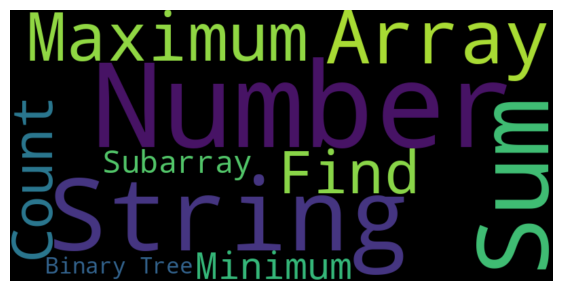

In [24]:
# Generate a word cloud
wordcloud = WordCloud(
    width=800, height=400, max_words=10,
    min_word_length=3,
    background_color='black'
).generate(' '.join(df['title']))

# Display the word cloud
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### `4. Difficulty Level`

In [25]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Pie(
            labels=df['difficulty'].value_counts().index.tolist(),
            values=df['difficulty'].value_counts().values.tolist(),
            insidetextfont=dict(color='black', size=18, family='Arial'),
        )
    ]
)

fig.update_layout(
    title_text='LeetCode Difficulty Level',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.48,
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
    textfont_size=15,
    marker=dict(colors=['#FFD700', '#00CED1', '#FF8C00'], line=dict(color='#000000', width=2))
)

fig.show()

### `5. Acceptance Rate`

In [26]:
df['acceptance'].describe()

,acceptance
count,3000.000000
mean,55.610367
std,15.702667
min,11.300000
25%,44.000000
50%,55.000000
75%,66.700000
max,94.200000


In [27]:
df['acceptance'].skew()

0.09645743208423796

In [28]:
df['acceptance'].kurt()

-0.5838369996903379

In [29]:
fig = px.histogram(
    df,
    x='acceptance',
    marginal='box',
    nbins=10,
    color_discrete_sequence=['#FF8C00']
)

fig.update_layout(
    title_text='Distribution of Acceptance Rates',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.33,
    xaxis_title='Acceptance Rate',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 110, 10)))
)

fig.show()

- The acceptance rates show a relatively symmetric distribution, indicating no significant skew.
- The typical acceptance rate is around **55%**, suggesting that about **55%** of submitted solutions are accepted on average.

### `6. Problem Description`

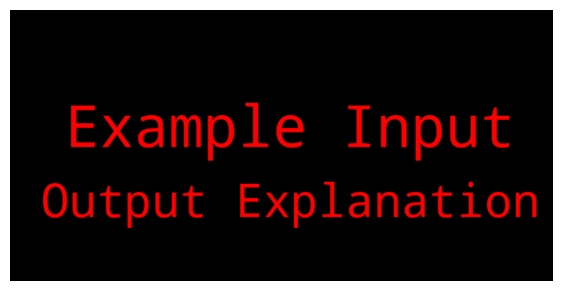

In [30]:
# Generate a word cloud
wordcloud = WordCloud(
    width=800, height=400, max_words=2, background_color='black',
    min_word_length=4, random_state=41,
    color_func=lambda *args, **kwargs: 'red').generate(
' '.join(df.dropna(subset=['problem_description'])['problem_description']),
)

# Display the word cloud
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- The problem descriptions focus on terms like `Example`, `Input`, `Output`, and `Explanation`, emphasizing clarity and providing strong examples.

### `7. Topic Tags`

In [31]:
tag_counts = df['topic_tags'].str.split(', ').explode().value_counts(ascending=True)[-10:]
tag_counts = tag_counts.reset_index()
fig = px.bar(tag_counts, x='count', y='topic_tags',
             orientation='h',
             title='Top 10 Most Common Individual Topic Tags Distribution',
             text_auto='.s'
)

fig.update_layout(
    title_text='Top 10 Most Common Individual Topic Tags Distribution',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.22,
    xaxis_title='Frequency',
    yaxis_title='Topic Tag',
)

fig.update_traces(marker_color = '#FF8C00', marker_line_color = 'black',
                  marker_line_width = 1, opacity = 0.8)

fig.show()

### `8. Similar Questions`

In [32]:
similar_df = df[df['similar_questions'].notna() & (df['similar_questions'] != "['']")]['similar_questions'].apply(eval).explode().value_counts(ascending=True).reset_index()
similar_df = similar_df[-10:]

fig = px.bar(similar_df, x='count', y='similar_questions',
             orientation='h',
             text_auto='.s'
)

fig.update_layout(
    title_text='Top 10 Most Suggest Similar Questions',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.78,
    xaxis_title='Frequency',
    yaxis_title='Problem Title',
)

fig.update_traces(marker_color = '#00CED1', marker_line_color = 'black',
                  marker_line_width = 1, opacity = 0.8)

fig.show()

### `9. Number of Similar Questions`

In [33]:
no_similar_df = df[df['no_similar_questions'].notna()]['no_similar_questions'].apply(round).value_counts(ascending=True).reset_index()
no_similar_df.loc[no_similar_df['count'] < 100, 'index'] = 'Other'
no_similar_df.loc[no_similar_df['count'] >= 100, 'index'] = no_similar_df.loc[no_similar_df['count'] >= 100, 'count']

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Other','Other','Other','Other','Other','Other','Other','Other','Other',
                    'Other','Other','Other','3 Question','2 Question','1 Question','No Question'],
            values=no_similar_df['count'].tolist(),
            marker=dict(
                line=dict(color='#000000', width=2)
            )
        )
    ]
)

fig.update_layout(
    title_text='Distribution of Number of Similar Questions',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.27,
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
        textfont=dict(
        family='Arial',
        size=17,
        color='black',
    ),
    textposition='inside'
)

fig.show()

### `10. Accepted, Submission, Solution, Discussion Count, Likes, Dislikes`

In [ ]:
df[['accepted', 'submission', 'solution', 'discussion_count', 'likes','dislikes']].describe()

,accepted,submission,solution,discussion_count,likes,dislikes
count,2.160000e+03,2.160000e+03,2160.000000,2160.000000,2160.000000,2160.000000
mean,2.478878e+05,4.752565e+05,1653.675926,27.246296,2774.904630,403.934259
std,5.373006e+05,1.118383e+06,2515.823036,40.675622,4186.567949,986.693398
min,1.200000e+03,2.400000e+03,24.000000,0.000000,15.000000,1.000000
25%,2.350000e+04,4.897500e+04,286.000000,6.000000,456.000000,44.000000
50%,6.630000e+04,1.169000e+05,706.000000,12.000000,1100.000000,132.000000
75%,2.151500e+05,3.850750e+05,1900.000000,33.000000,3200.000000,354.250000
max,1.130000e+07,2.210000e+07,26800.000000,638.000000,52700.000000,17200.000000


In [34]:
np.log10(df[['accepted', 'submission', 'solution', 'discussion_count', 'likes','dislikes']]+1).skew()

,0
accepted,0.276446
submission,0.452986
solution,0.114964
discussion_count,0.303143
likes,-0.002128
dislikes,0.033791


In [ ]:
np.log10(df[['accepted', 'submission', 'solution', 'discussion_count', 'likes','dislikes']]+1).kurt()

accepted           -0.480858
submission         -0.292886
solution           -0.527651
discussion_count   -0.441307
likes              -0.361280
dislikes           -0.231120
dtype: float64

In [ ]:
# Create a subplot layout
fig = make_subplots(rows=1, cols=1)

# Create box plots for each column
for col in ['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']:
    # Add a box plot trace for each column
    fig.add_trace(go.Box(y=np.log10(df[col]+1), name=col.capitalize(), width=0.6), row=1, col=1)

fig.update_layout(
    title_text='Comparison of User Engagement Metrics',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Metrics',
    yaxis_title='Log Values',
    boxmode='group'
)

# Show the plot
fig.show()

<center><h2>Bivariate Analysis</h2></center>

1. **Analysis of Premium and Non-Premium Problem Frequencies Across Pages**
    - The number of premium and non-premium problems on each page is not the same.
    - Pages 45 to 50 exclusively have premium problems.

<hr/>

2. **Exploring the relation: Page Number and Highest Contribution by Topic Tag**
    - The percentage of each topic tag's contribution varies from page to page, ranging from 11.27% to 26.51%.
    - Most pages have the highest contribution from the topic tag 'Array', except for pages 3 and 53.
    - Page 3's highest contribution comes from 'Binary Tree' (11.49%), while page 53's highest is 'Javascript' (19.59%).

<hr/>

3. **Distribution of Difficulty Level in Premium & Non-Premium**
    - In premium problems, 20% are easy, 56.2% are medium, and 23.8% are hard.
    - In non-premium problems, 27.4% are easy, 51.2% are medium, and 21.4% are hard.

<hr/>

4. **Distribution of Acceptance Rate in Premium and Non-Premium Problem**
    - Premium problems have an average acceptance rate of 58.3%, compared to 53.55% for non-premium problems.
    - Generally, premium problems have higher acceptance rates than non-premium ones.

<hr/>

5. **Distribution of Acceptance Rate in Difficulty Level**
    - Easy problems have the highest average acceptance rate (65.53%), followed by medium (54.69%) and hard (46.40%).

<hr/>

6. **Most Common Topic Tags in Difficulty Levels:**

    - The top 5 most common topic tags across different difficulty levels are 'Array', 'String', 'Hash Table', 'Dynamic Programming', 'Math', 'Sorting', and 'Binary Search'.
        - **Array**: Most seen in medium difficulty, then hard, and less in easy problems.
        - **String**: Mostly in medium, then easy, and less in hard.
        - **Hash Table**: Mostly in medium, then easy, less in hard.
        - **Dynamic Programming**: Most in medium, increasing from easy to hard.
        - **Math**: Frequently in medium, then easy, slightly less in hard.
        - **Sorting**: Mainly in medium, then easy, less in hard.
        - **Binary Search**: More in medium, then hard, less in easy.
        
<hr/>

7. **Distribution of Accepted, Submission, Solution, Discussion Count, Likes, Dislikes in Difficulty Levels:**
    - **Accepted Submissions**: 'Easy' problems have notably more accepted submissions than 'Medium' and 'Hard', indicating their simplicity.
    - **Submission Activity**: Highest submission activity is for 'Easy' problems, then 'Medium', and least for 'Hard'.
    - **Solution Submissions**: More solutions are submitted for 'Easy' problems compared to 'Medium' and 'Hard', reflecting users' willingness to share solutions.
    - **Discussion Engagement**: Discussions are most active for 'Easy' problems, then 'Medium', and least for 'Hard'.
    - **Likes and Dislikes**: 'Medium' problems receive the most likes, while 'Easy' problems get the most dislikes, suggesting 'Medium' problems are more engaging.

### `1. Analysis of Premium and Non-Premium Problem Frequencies Across Pages`

In [35]:
dfs =[]

for page_number in df['page_number'].unique():
    temp_df = df[df['page_number'] == page_number]
    premium_count = temp_df[temp_df['is_premium'] == True].shape[0]
    non_premium_count = temp_df[temp_df['is_premium'] == False].shape[0]
    temp_result_df = pd.DataFrame(
        {
            'page_number': [page_number],
            'Premium': [premium_count],
            'Non Premium': [non_premium_count]
        }
    )
    dfs.append(temp_result_df)

result_df = pd.concat(dfs, ignore_index=True)

fig = px.bar(
    result_df,
    x='page_number',
    y=['Non Premium', 'Premium'],
    color_discrete_map={ 'Non Premium': '#3330E4', 'Premium': '#FF0060'},
    width=750
)

fig.update_layout(
    title_text='Analysis of Premium and Non-Premium Problem Frequencies Across Pages',
    title_font=dict(size=15, family='Arial', color='black'),
    xaxis_title='Page Number',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 62, 1))),
    legend_title_text='Premium Status',
    title_x=0.45,
    width=750,
    height=450
)

fig.update_layout(xaxis=dict(tickfont=dict(size=9)), bargap=0)
fig.show()

### `2. Exploring the relation: Page Number and Highest Contribution by Topic Tag`

In [36]:
page_number = 60
topic_frequency_per_page = []
for page in range(1,page_number+1):
    temp_df = df[df['page_number']==page]
    temp_ds = temp_df['topic_tags'].str.split(',').explode().value_counts()
    temp_ds_head = temp_ds.head(1)
    if temp_ds_head.shape[0]!=0:
        topic = temp_ds_head.index[0].replace("'", "").strip()
        frequency = round(((temp_ds_head.values[0]/temp_ds.sum())*100),2)
        topic_frequency_per_page.append([page, topic, frequency])
temp_df = pd.DataFrame(topic_frequency_per_page, columns=['page_number','topic_tag', 'contribution'])

In [37]:
temp_df['contribution'].min(), temp_df['contribution'].max()

(11.27, 26.51)

In [38]:
temp_df['contribution'].describe()

,contribution
count,54.000000
mean,18.237593
std,3.566280
min,11.270000
25%,15.287500
50%,18.925000
75%,20.352500
max,26.510000


In [39]:
fig = px.scatter(temp_df, x='page_number', y='contribution', color='topic_tag', size='contribution')
fig.update_layout(
    title_text='Exploring the relation: Page Number and Highest Contribution by Topic Tag',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Page Number',
    yaxis_title='Contribution',
    legend_title_text='Topic Tag'
)

fig.show()

### `3. Distribution of Difficulty Level in Premium & Not Premium`

In [40]:
# Grouping and counting for Premium=True
premium_true_data = df[df['is_premium'] == True].groupby('difficulty').size()

# Grouping and counting for Premium=False
premium_false_data = df[df['is_premium'] == False].groupby('difficulty').size()

# Plotting side-by-side pie charts with hole
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=premium_true_data.index,
    values=premium_true_data.values,
    domain=dict(x=[0, 0.45]),
    hole=0.4,
    insidetextfont=dict(color='black', size=18, family='Arial'),
))

fig.add_trace(go.Pie(
    labels=premium_false_data.index,
    values=premium_false_data.values,
    domain=dict(x=[0.55, 1]),
    hole=0.4,
    name='Not Premium',
    insidetextfont=dict(color='black', size=18, family='Arial'),
))

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
    textfont_size=15,
    marker=dict(colors=['#FFD700', '#00CED1', '#FF8C00'], line=dict(color='#000000', width=2))
)

fig.update_layout(
    title_text='Distribution of Difficulty Level in Premium & Not Premium',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.22,
    annotations=[dict(text='Premium', x=0.169, y=0.5, font_size=18, showarrow=False, ),
                 dict(text='Not Premium', x=0.847, y=0.5, font_size=18, showarrow=False)],
    legend_title_text='Difficulty Level'
)

fig.show()

### `4. Distribution of Acceptance Rate in Premium and Non-Premium Problem`

In [41]:
df[df['is_premium'] == True]['acceptance'].describe()

,acceptance
count,840.000000
mean,58.734048
std,15.308346
min,15.700000
25%,47.600000
50%,58.300000
75%,69.800000
max,94.200000


In [42]:
df[df['is_premium'] == False]['acceptance'].describe()

,acceptance
count,2160.000000
mean,54.395602
std,15.689720
min,11.300000
25%,42.900000
50%,53.550000
75%,65.300000
max,92.600000


In [43]:
premium_data = df[df['is_premium'] == True]['acceptance']
non_premium_data = df[df['is_premium'] == False]['acceptance']

hist_data = [non_premium_data, premium_data]
group_labels = ['Non-Premium', 'Premium']
colors=['green', 'red']


fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)


fig.update_layout(
    title_text='Acceptance Rate in Premium and Non-Premium Problem',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Acceptance Rate',
    yaxis_title='PDE',
    legend_title_text='Premium Status'
)

fig.show()

### `5. Distribution of Acceptance Rate in Difficulty Level`

In [44]:
easy_data = df[df['difficulty'] == 'Easy']['acceptance']
medium_data = df[df['difficulty'] == 'Medium']['acceptance']
hard_data = df[df['difficulty'] == 'Hard']['acceptance']

In [45]:
easy_data.mean(), medium_data.mean(), hard_data.mean()

(65.53868421052631, 54.694102726696265, 46.40889894419306)

In [46]:
box_data = [easy_data, medium_data, hard_data]
box_labels = ['Easy', 'Medium', 'Hard']
colors = ['green', 'gold', 'red']

fig = go.Figure()

for i in range(len(box_data)):
    fig.add_trace(go.Box(y=box_data[i], name=box_labels[i], marker_color=colors[i]))

fig.update_layout(
    title_text='Acceptance Rate Across Difficulty Levels',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Difficulty Level',
    yaxis_title='Acceptance Rate',
    legend_title_text='Difficulty Level'
)
fig.show()

### `6. Most Common Topic Tag in Difficulty Level`

In [47]:
x = set(df[df['difficulty'] == 'Easy']['topic_tags'].str.split(', ').explode().str.replace("'", "").value_counts(ascending=True)[-5:]\
.index) | set(df[df['difficulty'] == 'Medium']['topic_tags'].str.split(', ').explode().str.replace("'", "").value_counts(ascending=True)[-5:]\
.index) | set(df[df['difficulty'] == 'Hard']['topic_tags'].str.split(', ').explode().str.replace("'", "").value_counts(ascending=True)[-5:]\
.index)

In [48]:
list(x)

['Math',
 'Sorting',
 'Hash Table',
 'Binary Search',
 'Array',
 'Dynamic Programming',
 'String']

In [49]:
# Define the topic tags to compare
topic_tags = ['Array', 'String', 'Hash Table', 'Dynamic Programming', 'Math', 'Sorting', 'Binary Search']

# Initialize dictionaries to store counts for each difficulty level
easy_counts = {}
medium_counts = {}
hard_counts = {}

# Count occurrences of each tag for each difficulty level
for tag in topic_tags:
    easy_counts[tag] = len(df[(df['difficulty'] == 'Easy') & (df['topic_tags'].str.contains(tag))])
    medium_counts[tag] = len(df[(df['difficulty'] == 'Medium') & (df['topic_tags'].str.contains(tag))])
    hard_counts[tag] = len(df[(df['difficulty'] == 'Hard') & (df['topic_tags'].str.contains(tag))])

# Create a DataFrame for bar chart
tag_comparison = pd.DataFrame({
    'Topic Tag': topic_tags,
    'Easy': list(easy_counts.values()),
    'Medium': list(medium_counts.values()),
    'Hard': list(hard_counts.values())
})

# Melt the DataFrame for easier plotting
tag_comparison_melted = tag_comparison.melt(id_vars='Topic Tag', var_name='Difficulty', value_name='Count')

# Plotting with specified colors
fig = px.bar(tag_comparison_melted, y='Count', x='Topic Tag', color='Difficulty',
             orientation='v', barmode='group',
             title='Comparison of Topic Tags Across Difficulty Levels',
             labels={'Count': 'Frequency', 'Topic Tag': 'Topic Tag'},
             color_discrete_map={'Easy': 'green', 'Medium': 'gold', 'Hard': 'red'})

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    yaxis_title='Frequency',
    xaxis_title='Topic Tag',
)

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.8)

fig.show()

### `7. Distribution of accepted, submission, solution, discussion_count, likes, dislikes in Difficulty Levels`

In [50]:
easy_df = df[df['difficulty']=='Easy']
medium_df = df[df['difficulty']=='Medium']
hard_df = df[df['difficulty']=='Hard']

In [51]:
df_metrics = pd.concat([easy_df[['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']].median(),\
            medium_df[['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']].median(),\
            hard_df[['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']].median()], axis=1, names=['Metrics'],keys=['easy','medium','hard'])

In [52]:
df_metrics

Metrics,easy,medium,hard
accepted,117250.0,70000.0,23300.0
submission,182150.0,125500.0,52600.0
solution,1300.0,694.0,211.0
discussion_count,16.0,12.0,8.0
likes,1000.0,1400.0,788.0
dislikes,164.0,155.0,68.0


In [53]:
# Create a subplot layout
fig = make_subplots(rows=2, cols=3, subplot_titles=('Accepted', 'Submission', 'Solution', 'Discussion Count', 'Likes', 'Dislikes'))

# Create box plots for each metric
metrics = ['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']
colors =  ['green', 'gold', 'red']

for i, metric in enumerate(metrics, start=1):
    # Filter data by difficulty level and extract values for the metric
    easy_values = np.log10(df[df['difficulty'] == 'Easy'][metric] + 1)
    medium_values = np.log10(df[df['difficulty'] == 'Medium'][metric] + 1)
    hard_values = np.log10(df[df['difficulty'] == 'Hard'][metric] + 1)

    # Add box plots for each difficulty level
    fig.add_trace(go.Box(y=easy_values, name='Easy', marker_color=colors[0]), row=(i-1)//3+1, col=(i-1)%3+1)
    fig.add_trace(go.Box(y=medium_values, name='Medium', marker_color=colors[1]), row=(i-1)//3+1, col=(i-1)%3+1)
    fig.add_trace(go.Box(y=hard_values, name='Hard', marker_color=colors[2]), row=(i-1)//3+1, col=(i-1)%3+1)

# Update layout with a single legend
fig.update_layout(
    title_text='Comparison of Metrics by Difficulty Level',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    showlegend=True,
    height=600,
    width=800,
    legend=dict(
        traceorder='normal',
        itemsizing='constant',
        title_text='Difficulty Level',
        bordercolor='gray',
        borderwidth=2
    )
)

# Set showlegend to False for all traces except the first one in each subplot
for i in range(3, len(fig.data)):
    fig.data[i].update(showlegend=False)


# Show the plot
fig.show()


<center><h2>Multivariate Analysis</h2></center>

1. **Exploring Topic Relevance**
    - The top 9 topics with the lowest positive reaction percentages reveal that even niche or complex areas like "Interactive", "Concurrency", and "Randomized" receive relatively high engagement.

<hr/>


### `1. Exploring Topic Relevance`

In [54]:
temp_df1 = df['topic_tags'].str.replace("'","").str.replace(" ","").str.split(',').explode().reset_index()
temp_df2 = df[['difficulty', 'acceptance','submission','likes','dislikes']].copy()
temp_df3 = temp_df1.set_index('index').join(temp_df2, on='index', how='left')
temp_df4 = temp_df3.groupby('topic_tags')['topic_tags'].count().to_frame(name='topic_frequency')
temp_df5 = temp_df3.groupby('topic_tags')[['acceptance','submission','likes','dislikes']].median()
temp_df6 = temp_df3.groupby('topic_tags')['difficulty'].agg(mode)
temp_df = pd.merge(temp_df5, temp_df4, on="topic_tags")
temp_df = pd.merge(temp_df, temp_df6, on="topic_tags")
temp_df.reset_index(inplace=True)
temp_df.rename(columns= {"acceptance": "avg_acceptance", "submission": "avg_submission",
                "likes":"avg_likes", "dislikes": "avg_dislikes", "difficulty": "mode_difficulty"}
               ,inplace=True)
temp_df['positive_reaction_percentage'] = (temp_df['avg_likes'] / (temp_df['avg_likes'] + temp_df['avg_dislikes'])) * 100

In [55]:
# Filter and sort the DataFrame
temp = temp_df.sort_values(by=['positive_reaction_percentage'], ascending=True)[:9]  # topic_frequency 1 to 5

# Map difficulty modes to colors
color_map = {"Easy": "green", "Medium": "gold", "Hard": "red"}

# Create the Plotly bubble plot
fig = px.scatter(temp, x="positive_reaction_percentage", y="topic_tags", size="topic_frequency", color="mode_difficulty",
                 hover_name="topic_tags", title="Exploring Topic Relevance, Difficulty, and Engagement Metrics",
                 labels={"positive_reaction_percentage": "Positive Reaction Percentage", "topic_tags": "Topic Tags"},
                 size_max=30, color_discrete_map=color_map,
                 text="topic_frequency")  # Add topic_frequency to be displayed in the bubbles

# Customize the layout
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.50,
    xaxis=dict(title="Positive Reaction Percentage"),
    yaxis=dict(title="Topic Tags"),
    legend_title="Difficulty Mode",
    height=600,
)

# Show the plot
fig.show()